# 🧪 K-Means Clustering Implementation


In this lab, we will explore **K-Means Clustering**, an unsupervised learning algorithm used to group data into clusters.  
We will use a sample dataset (`income.csv`) and visualize the results using scatter plots.

---

**Learning Objectives**:
- Implement K-Means using `scikit-learn`
- Visualize clusters with Matplotlib / seaborn
- Use the **Elbow Method** to find the optimal `k`





## Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load Dataset

In [3]:
# Load the dataset
data = pd.read_csv("income.csv")

# Display first few rows
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Exploratory Data Analysis (EDA)

In [4]:
# Basic info
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes
None
             Age      Income($)
count  22.000000      22.000000
mean   34.818182   90431.818182
std     5.901060   43505.964412
min    26.000000   45000.000000
25%    29.000000   58500.000000
50%    36.500000   67500.000000
75%    39.750000  135250.000000
max    43.000000  162000.000000


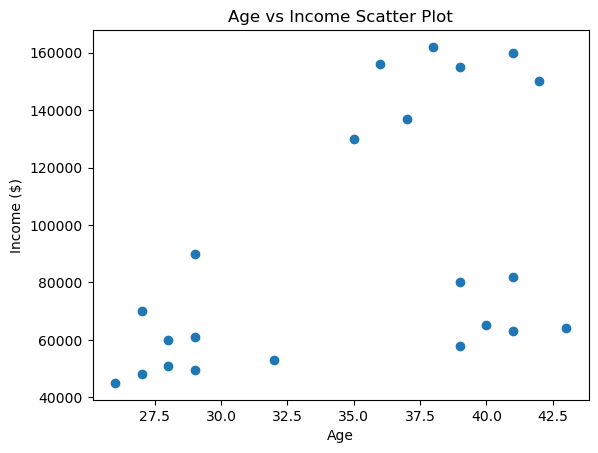

In [5]:
# Quick visualization
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.title("Age vs Income Scatter Plot")
plt.show()

## Apply K-Means Clustering

In [6]:
# Apply KMeans with 3 clusters (example)
km = KMeans(n_clusters=3, n_init='auto')
km.fit(data[["Age", "Income($)"]])
km.labels_



array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [7]:
data['Cluster'] = km.labels_
data.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
# scatter plot

<Axes: xlabel='Age', ylabel='Income($)'>

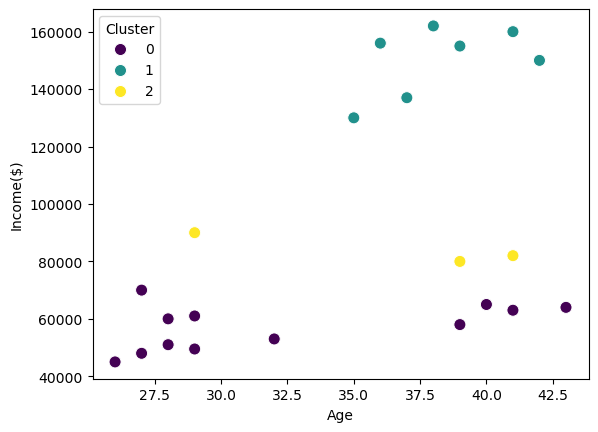

In [8]:
import seaborn as sns

sns.scatterplot(data, x='Age', y='Income($)',  palette='viridis', s=75, hue="Cluster")

When K-Means was applied on Age vs. Income data, the clusters looked incorrect because the features were on very different scales.
- Since Income had much larger values than Age, it dominated the distance calculations.
- To fix this, we need to scale the data (e.g., using **StandardScaler or MinMaxScaler**) so that all features contribute fairly to clustering.
  
**Conclusion**: Always consider **scaling** your data before applying K-Means or any distance-based algorithm.

### MinMax Scaling

Clusters are not formed properly. It can be due to Age and Income columns being on a different scale. We can try scaling them

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

data_scaled[["Age", "Income($)"]] = scaler.fit_transform(data[["Age", "Income($)"]])
data_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [10]:
# Apply KMeans with 3 clusters

km = KMeans(n_clusters=3, n_init='auto')
km.fit(data_scaled[["Age", "Income($)"]])
data_scaled['cluster']= km.labels_

<Axes: xlabel='Age', ylabel='Income($)'>

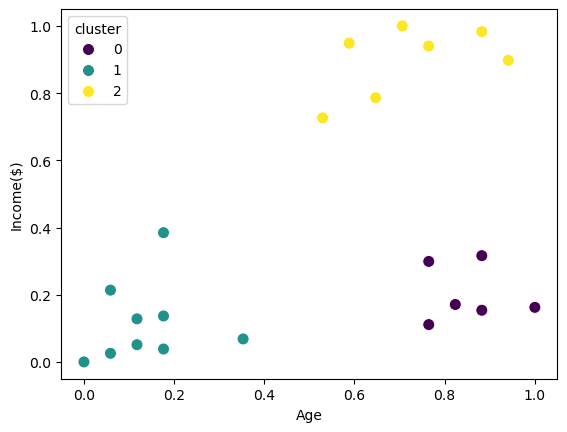

In [11]:
# scatter plot showing the clusters

import seaborn as sns

sns.scatterplot(data_scaled, x='Age', y='Income($)',  palette='viridis', s=75, hue="cluster")


In [12]:
km.inertia_

0.4750783498553096

In [13]:
centroids = km.cluster_centers_
centroids

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

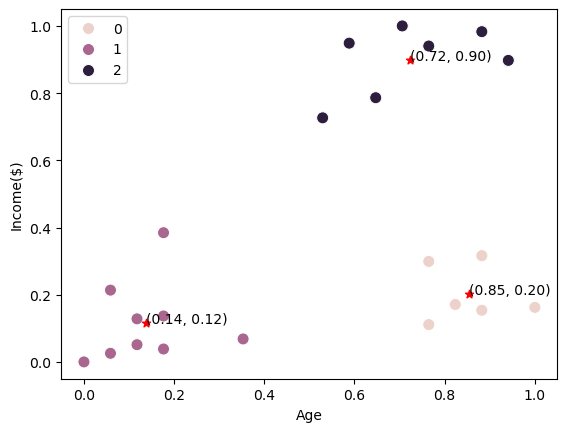

In [14]:
## show the k-Means centroids in scatter plot

sns.scatterplot(data_scaled, x='Age', y='Income($)', s=75, hue=km.labels_)
plt.scatter(centroids[:,0] , centroids[:,1], marker='*', c='red')

for i in range(len(centroids)):
    plt.text(centroids[i,0], centroids[i,1],
             f"({centroids[i,0]:.2f}, {centroids[i,1]:.2f})")

***

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math


# 2. Scale Age and Income($) using MinMaxScaler -> creates Age_scaled, Income_scaled in [0,1]
scaler = MinMaxScaler()
df = pd.read_csv("income.csv")
df[['Age_scaled', 'Income_scaled']] = scaler.fit_transform(df[['Age', 'Income($)']])

# We'll cluster on scaled values only
data = df[['Age_scaled', 'Income_scaled']].copy()

# 3. Initialize 3 random centroids from actual data points (reproducible using seed 42)
np.random.seed(42)
centroids = data.sample(n=3, random_state=42).to_numpy()

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

history = []  # to store each iteration's centroids + distance table

# 4. Run manual K-Means for 3 iterations
for it in range(1, 4):  # Iteration 1,2,3
    distances_all_points = []
    cluster_assignments = []

    # --- Step A: distance of every point to every centroid
    for _, row in data.iterrows():
        point = (row['Age_scaled'], row['Income_scaled'])
        d_to_centroids = [euclidean_distance(point, centroids[c]) for c in range(3)]
        distances_all_points.append(d_to_centroids)

        # assign to nearest centroid (cluster numbers 1,2,3 for readability)
        cluster_assignments.append(int(np.argmin(d_to_centroids)) + 1)

    # --- Step B: build a nice table for this iteration
    dist_arr = np.array(distances_all_points)
    iter_table = df[['Name', 'Age', 'Income($)', 'Age_scaled', 'Income_scaled']].copy()
    iter_table['Distance_C1'] = dist_arr[:, 0]
    iter_table['Distance_C2'] = dist_arr[:, 1]
    iter_table['Distance_C3'] = dist_arr[:, 2]
    iter_table['Cluster'] = cluster_assignments

    # save current centroids and table
    iter_centroids_df = pd.DataFrame(
        centroids,
        columns=['Age_scaled', 'Income_scaled'],
        index=[f'C{i+1}' for i in range(3)]
    )
    history.append((it, iter_centroids_df, iter_table))

    # --- Step C: recompute centroids = mean of points in each cluster
    new_centroids = []
    cluster_assignments_np = np.array(cluster_assignments)

    for cluster_id in range(1, 4):  # for cluster 1,2,3
        cluster_points = data[cluster_assignments_np == cluster_id]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0).to_numpy())
        else:
            # if no points went to a centroid, keep it where it was
            new_centroids.append(centroids[cluster_id - 1])

    centroids = np.vstack(new_centroids)

# 5. Print all iterations in a readable way
for it, cents, table in history:
    print(f"\n================ ITERATION {it} =================\n")

    print("Centroids used this iteration (scaled):")
    print(cents)  # this shows C1, C2, C3 coordinates in scaled space

    print("\nDistance table + cluster assignment:")
    # includes:
    # Name, Age, Income($), scaled cols,
    # distance to each centroid,
    # and final Cluster for that iteration
    print(table.to_string(index=False))


================ ITERATION 1 =================

Centroids used this iteration (scaled):
    Age_scaled  Income_scaled
C1    0.058824       0.213675
C2    0.117647       0.051282
C3    0.588235       0.948718

Distance table + cluster assignment:
    Name  Age  Income($)  Age_scaled  Income_scaled  Distance_C1  Distance_C2  Distance_C3  Cluster
     Rob   27      70000    0.058824       0.213675     0.000000     0.172719     0.905850        1
 Michael   29      90000    0.176471       0.384615     0.207512     0.338484     0.698400        1
   Mohan   29      61000    0.176471       0.136752     0.140563     0.103756     0.910406        2
  Ismail   28      60000    0.117647       0.128205     0.103756     0.076923     0.945883        2
    Kory   42     150000    0.941176       0.897436     1.116277     1.180753     0.356647        3
  Gautam   39     155000    0.764706       0.940171     1.012949     1.099458     0.176677        3
   David   41     160000    0.882353       0.982906  

## Elbow Method to determine optimal number of clusters

In [15]:
sse = [] # or WCSS

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto',random_state=42)
    km.fit(data_scaled[["Age", "Income($)"]])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.3871991429772462,
 0.2247696122877267,
 0.17473586079225928,
 0.14580719346046297,
 0.11073569527418642]

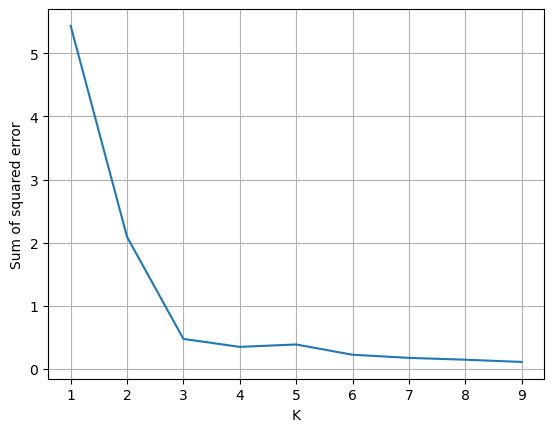

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.grid(True)
plt.show()

The chart shows optimal number of clusters are 3

***